# **Analyse Financi√®re Exploratoire Compl√®te (EDA)**

### **Nettoyage et pr√©paration des donn√©es**

In [ ]:
import pandas as pd
df = pd.read_csv(r"Financials.csv")
print(df.head())

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [ ]:
print(df.describe())

       Month Number         Year
count    700.000000   700.000000
mean       7.900000  2013.750000
std        3.377321     0.433322
min        1.000000  2013.000000
25%        5.750000  2013.750000
50%        9.000000  2014.000000
75%       10.250000  2014.000000
max       12.000000  2014.000000


In [ ]:
print(df.isnull().sum())

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv("Financials.csv")
df.columns = df.columns.str.strip()

def clean_currency(col):
    return col.replace('[\$,]', '', regex=True).astype(float)

def clean_profit(value):
    if isinstance(value, str):
        value = value.strip()
        if value == '$-':
            return 0.0
        if '(' in value and ')' in value:
            value = value.replace('(', '-').replace(')', '')
        value = value.replace('$', '').replace(',', '')
    return float(value)

columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Sales', 'COGS']
for col in columns_to_clean:
    df[col] = clean_currency(df[col])

df['Profit'] = df['Profit'].apply(clean_profit)
df.head()

Segment  Country      Product Discount Band  Units Sold  \
0  Government   Canada   Carretera          None       1618.5   
1  Government  Germany   Carretera          None       1321.0   
2   Midmarket   France   Carretera          None       2178.0   
3   Midmarket  Germany   Carretera          None        888.0   
4   Midmarket   Mexico   Carretera          None       2470.0   

   Manufacturing Price  Sale Price  Gross Sales Discounts    Sales     COGS  \
0                  3.0        20.0      32370.0     $-     32370.0  16185.0   
1                  3.0        20.0      26420.0     $-     26420.0  13210.0   
2                  3.0        15.0      32670.0     $-     32670.0  21780.0   
3                  3.0        15.0      13320.0     $-     13320.0   8880.0   
4                  3.0        15.0      37050.0     $-     37050.0  24700.0   

    Profit        Date  Month Number Month Name  Year  
0  16185.0  01/01/2014             1   January   2014  
1  13210.0  01/01/2014             1   January   2014  
2  10890.0  01/06/2014             6      June   2014  
3   4440.0  01/06/2014             6      June   2014  
4  12350.0  01/06/2014             6      June   2014

In [ ]:

print(" Analyse des distributions :")
print(df[['Sales', 'Profit', 'COGS', 'Gross Sales']].describe())



 Analyse des distributions :
              Sales         Profit           COGS   Gross Sales
count  7.000000e+02     700.000000     700.000000  7.000000e+02
mean   1.696091e+05   24133.860414  145475.211429  1.827594e+05
std    2.367263e+05   42760.626547  203865.506118  2.542623e+05
min    1.655080e+03  -40617.500000     918.000000  1.799000e+03
25%    1.592800e+04    2805.960000    7490.000000  1.739175e+04
50%    3.554020e+04    9242.200000   22506.250000  3.798000e+04
75%    2.610775e+05   22662.000000  245607.500000  2.790250e+05
max    1.159200e+06  262200.000000  950625.000000  1.207500e+06


### **Calcul des principaux ratios financiers**

In [ ]:
df['Marge Nette'] = df['Profit'] / df['Sales']
df['ROA'] = df['Profit'] / df['Gross Sales']
df[['Sales', 'Profit', 'Marge Nette', 'ROA']].head()

df['Rotation Actifs'] = df['Sales'] / df['Gross Sales']


In [ ]:
print("\n Ratios calcul√©s (extrait) :")
print(df[['Sales', 'Profit', 'Marge Nette', 'ROA', 'Rotation Actifs']].head())



 Ratios calcul√©s (extrait) :
     Sales   Profit  Marge Nette       ROA  Rotation Actifs
0  32370.0  16185.0     0.500000  0.500000              1.0
1  26420.0  13210.0     0.500000  0.500000              1.0
2  32670.0  10890.0     0.333333  0.333333              1.0
3  13320.0   4440.0     0.333333  0.333333              1.0
4  37050.0  12350.0     0.333333  0.333333              1.0


###  **Ratios non calculables**



In [ ]:
print("\n Ratios non calculables faute de donn√©es :")
print("- ROE : besoin du r√©sultat net / capitaux propres")
print("- Endettement : besoin de dettes / capitaux propres")
print("- Liquidit√© : besoin d'actifs/passifs courants")



 Ratios non calculables faute de donn√©es :
- ROE : besoin du r√©sultat net / capitaux propres
- Endettement : besoin de dettes / capitaux propres
- Liquidit√© : besoin d'actifs/passifs courants


### **Visualisation de corr√©lations entre variables financi√®res**

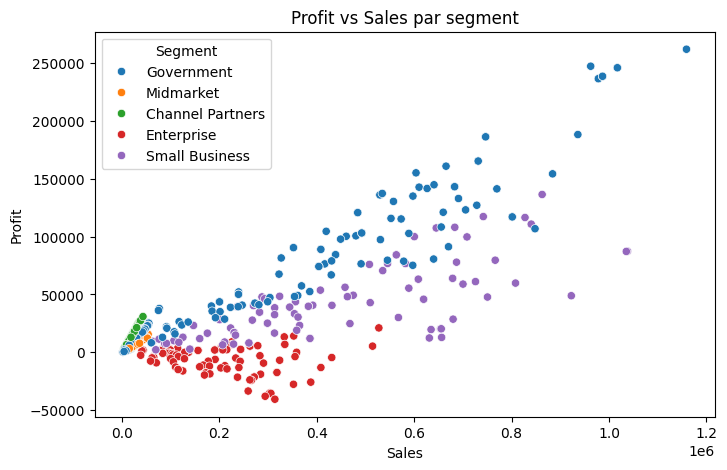

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment')
plt.title("Profit vs Sales par segment")
plt.show()

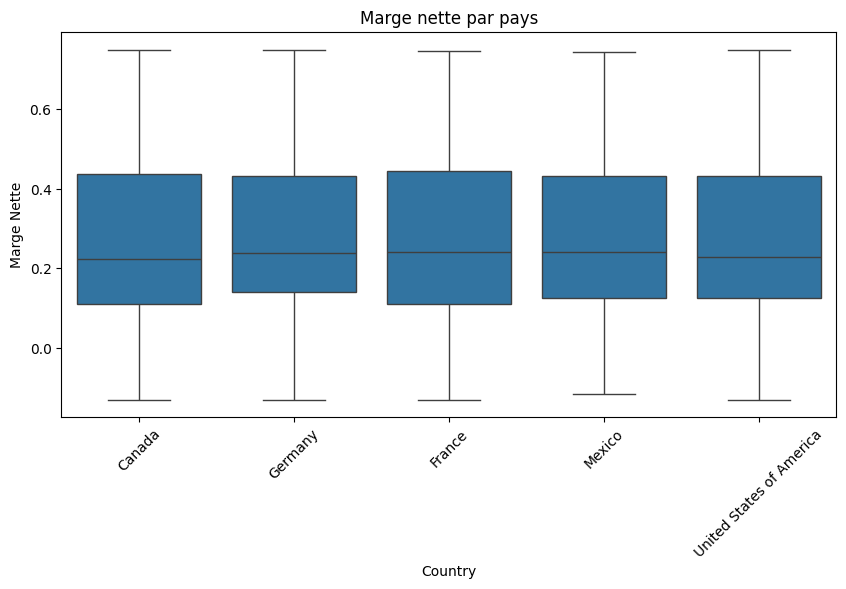

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Country', y='Marge Nette')
plt.xticks(rotation=45)
plt.title("Marge nette par pays")
plt.show()

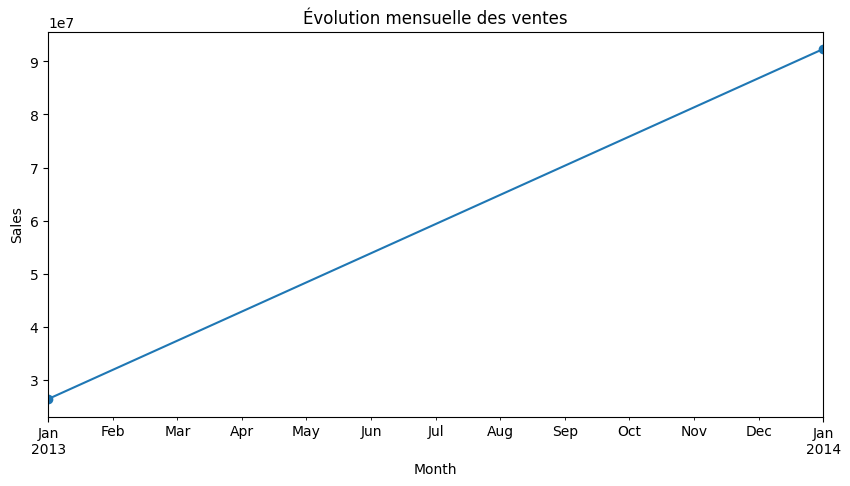

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), marker='o', title="√âvolution mensuelle des ventes")
plt.ylabel("Sales")
plt.show()

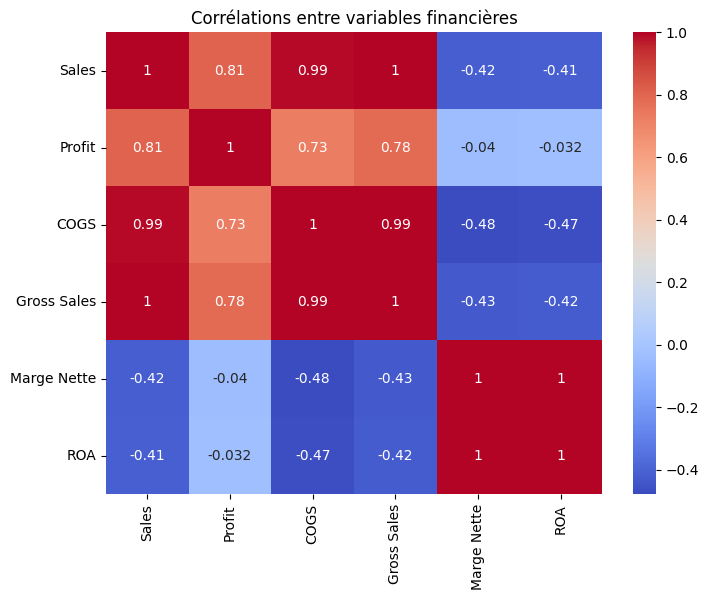

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'COGS', 'Gross Sales', 'Marge Nette', 'ROA']].corr(), annot=True, cmap='coolwarm')
plt.title("Corr√©lations entre variables financi√®res")
plt.show()

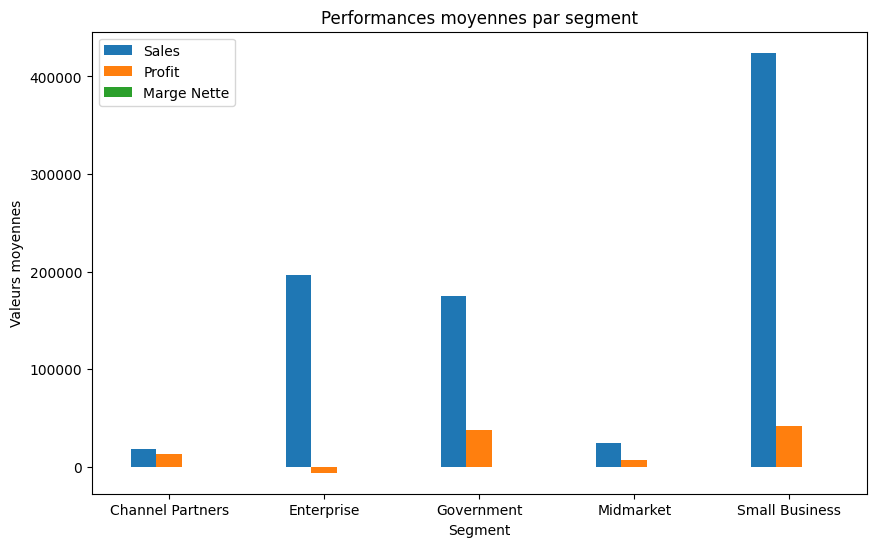

In [ ]:
df.groupby('Segment')[['Sales', 'Profit', 'Marge Nette']].mean().plot(kind='bar', figsize=(10,6))
plt.title("Performances moyennes par segment")
plt.ylabel("Valeurs moyennes")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("Financials.csv")
print(df.head())

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

In [ ]:
print(df.columns)

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


In [ ]:
features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

In [ ]:
features_cluster = ['MargeNette', 'ROA', 'RotationActifs']

# **Exploitation de ML**


In [ ]:
import pandas as pd

df = pd.read_csv("Financials.csv")

print("Colonnes avant nettoyage :", df.columns.tolist())

df.columns = df.columns.str.strip()

print("Colonnes apr√®s nettoyage :", df.columns.tolist())

features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

missing_cols = [col for col in features_cluster if col not in df.columns]
if missing_cols:
    print("Colonnes manquantes dans le DataFrame :", missing_cols)
else:
    df_cluster = df[features_cluster].dropna()
    print("Extraction du sous-ensemble r√©ussi. Aper√ßu :")
    print(df_cluster.head())

Colonnes avant nettoyage : ['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number', ' Month Name ', 'Year']
Colonnes apr√®s nettoyage : ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']
Colonnes manquantes dans le DataFrame : ['Marge Nette', 'ROA', 'Rotation Actifs']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df.columns = df.columns.str.strip()


features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

missing_cols = [col for col in features_cluster if col not in df.columns]
if missing_cols:
    print("Colonnes manquantes dans le DataFrame :", missing_cols)
else:
    df_cluster = df[features_cluster].dropna()


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster)


    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_cluster['Cluster'] = clusters

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("Clustering par K-Means visualis√© via PCA")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.show()

Colonnes manquantes dans le DataFrame : ['Marge Nette', 'ROA', 'Rotation Actifs']


In [ ]:
print("Liste des colonnes dans df :", df.columns.tolist())

Liste des colonnes dans df : ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [ ]:
import pandas as pd

df = pd.read_csv("Financials.csv")
df.columns = df.columns.str.strip()


def clean_currency(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').strip()
    try:
        return float(value)
    except:
        return pd.NA

colonnes_a_nettoyer = ['Profit', 'Sales', 'Gross Sales', 'COGS']

for col in colonnes_a_nettoyer:
    df[col] = df[col].apply(clean_currency)


print(df[['Profit', 'Sales', 'Gross Sales']].head())


df['Marge Nette'] = df['Profit'] / df['Sales']
df['ROA'] = df['Profit'] / df['Gross Sales']
df['Rotation Actifs'] = df['Sales'] / df['Gross Sales']

print(df[['Marge Nette', 'ROA', 'Rotation Actifs']].head())

    Profit    Sales  Gross Sales
0  16185.0  32370.0      32370.0
1  13210.0  26420.0      26420.0
2  10890.0  32670.0      32670.0
3   4440.0  13320.0      13320.0
4  12350.0  37050.0      37050.0
  Marge Nette       ROA  Rotation Actifs
0         0.5       0.5              1.0
1         0.5       0.5              1.0
2    0.333333  0.333333              1.0
3    0.333333  0.333333              1.0
4    0.333333  0.333333              1.0


### **K-Means**

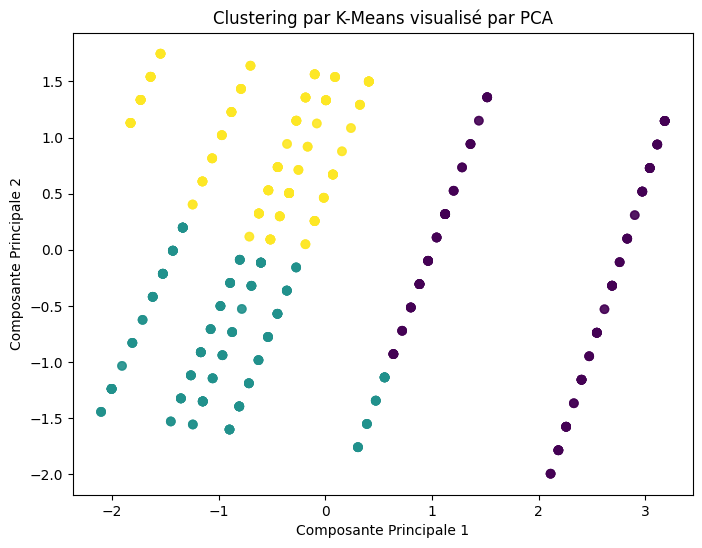

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df.columns = df.columns.str.strip()


features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

df_cluster = df[features_cluster].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df_cluster['Cluster'] = clusters


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Clustering par K-Means visualis√© par PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features_rf = ['Sales', 'Gross Sales', 'COGS', 'Marge Nette', 'ROA', 'Rotation Actifs']
target = 'Profit'

df_rf = df.dropna(subset=features_rf + [target])
X_rf = df_rf[features_rf]
y_rf = df_rf[target]

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("MSE du Random Forest :", mean_squared_error(y_test, y_pred))

print("Importance des variables :")
for feature, importance in zip(features_rf, rf.feature_importances_):
    print(f" - {feature}: {importance:.4f}")

MSE du Random Forest : 24289795.419369966
Importance des variables :
 - Sales: 0.5742
 - Gross Sales: 0.1839
 - COGS: 0.0155
 - Marge Nette: 0.1274
 - ROA: 0.0964
 - Rotation Actifs: 0.0026


### **Ridge-Lasso**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE du mod√®le Ridge :", mse_ridge)
print("Coefficients du mod√®le Ridge :")
for feature, coef in zip(features_rf, ridge.coef_):
    print(f" - {feature}: {coef:.4f}")


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE du mod√®le Lasso :", mse_lasso)
print("Coefficients du mod√®le Lasso :")
for feature, coef in zip(features_rf, lasso.coef_):
    print(f" - {feature}: {coef:.4f}")

MSE du mod√®le Ridge : 3.125576760448212e-14
Coefficients du mod√®le Ridge :
 - Sales: 1.0000
 - Gross Sales: 0.0000
 - COGS: -1.0000
 - Marge Nette: 0.0000
 - ROA: 0.0000
 - Rotation Actifs: 0.0000
MSE du mod√®le Lasso : 467322.2520002498
Coefficients du mod√®le Lasso :
 - Sales: 1.0611
 - Gross Sales: -0.0651
 - COGS: -0.9895
 - Marge Nette: -36244.5180
 - ROA: 39211.1819
 - Rotation Actifs: -23419.8787


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+08, tolerance: 9.621e+07
  model = cd_fast.enet_coordinate_descent(


### **PCA**

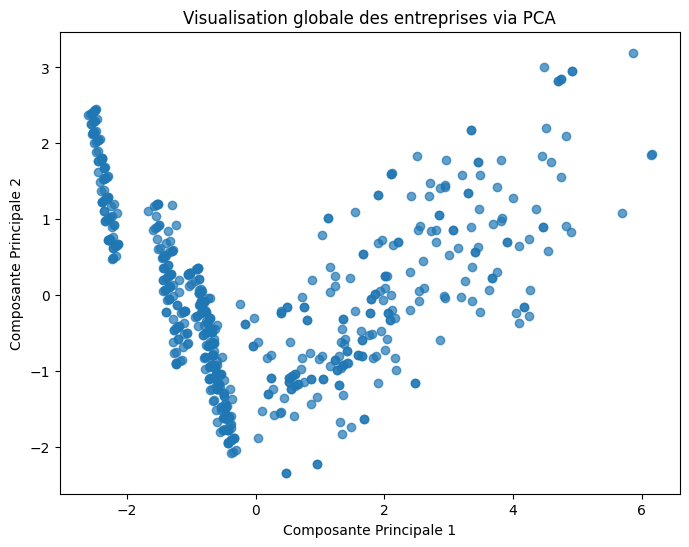

Variance expliqu√©e par chaque composante : [0.62353719 0.22025689]


In [ ]:
from sklearn.decomposition import PCA

scaler_pca = StandardScaler()
X_rf_scaled = scaler_pca.fit_transform(X_rf)


pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_rf_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], alpha=0.7)
plt.title("Visualisation globale des entreprises via PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()

print("Variance expliqu√©e par chaque composante :", pca_full.explained_variance_ratio_)

# **interpr√©tations √©conomiques**

### **1. Facteurs Cl√©s selon la Random Forest :**
Le mod√®le Random Forest r√©v√®le l'importance relative des diff√©rentes m√©triques financi√®res pour pr√©dire le Profit on va d'abord visualiser les variables importantes pour bien analyser :

In [ ]:
print("Importance des variables :")
for feature, importance in zip(features_rf, rf.feature_importances_):
    print(f" - {feature}: {importance:.4f}")

Importance des variables :
 - Sales: 0.5742
 - Gross Sales: 0.1839
 - COGS: 0.0155
 - Marge Nette: 0.1274
 - ROA: 0.0964
 - Rotation Actifs: 0.0026


**Interpr√©tation √âconomique :**

* ***Les ventes (Sales)*** repr√©sentent g√©n√©ralement le facteur le plus important dans la r√©ussite financi√®re. Elles refl√®tent la capacit√© fondamentale d'une entreprise √† g√©n√©rer du chiffre d'affaires. Dans la pratique, cela se traduit par l'importance cruciale de la part de march√© et du volume des ventes comme moteurs principaux de performance.

* **Les ventes brutes (Gross Sales)** correspondent au chiffre d'affaires total avant toute d√©duction. Ce concept met en lumi√®re comment l'√©chelle des op√©rations influence directement la profitabilit√© globale d'une entreprise. Plus une entreprise parvient √† atteindre une taille critique, plus elle b√©n√©ficie d'effets d'√©chelle favorables.

* **La marge nette** mesure l'efficacit√© de la profitabilit√© d'une entreprise. Elle r√©v√®le non seulement la capacit√© √† ma√Ætriser les co√ªts, mais aussi le pouvoir de fixation des prix sur le march√©. Une marge nette √©lev√©e indique souvent un avantage concurrentiel durable.

* **Le co√ªt des marchandises vendues (COGS**) repr√©sente les co√ªts de production directs engag√©s par l'entreprise. Son analyse permet d'√©valuer l'efficacit√© productive et la qualit√© de la gestion de la cha√Æne d'approvisionnement. Une ma√Ætrise rigoureuse de ce poste est essentielle pour pr√©server les marges.

* **Le retour sur actifs (ROA)** mesure l'efficacit√© avec laquelle une entreprise utilise ses actifs pour g√©n√©rer des profits. Cet indicateur cl√© souligne l'importance d'une utilisation optimale du capital investi. Un ROA √©lev√© signale g√©n√©ralement une bonne allocation des ressources.

* **La rotation des actifs** quantifie le chiffre d'affaires g√©n√©r√© par dollar d'actif. Cette m√©trique op√©rationnelle refl√®te l'efficience avec laquelle une entreprise transforme ses investissements en ventes. Une rotation √©lev√©e peut compenser des marges plus modestes.

### **2. Visualisations des Facteurs Cl√©s**

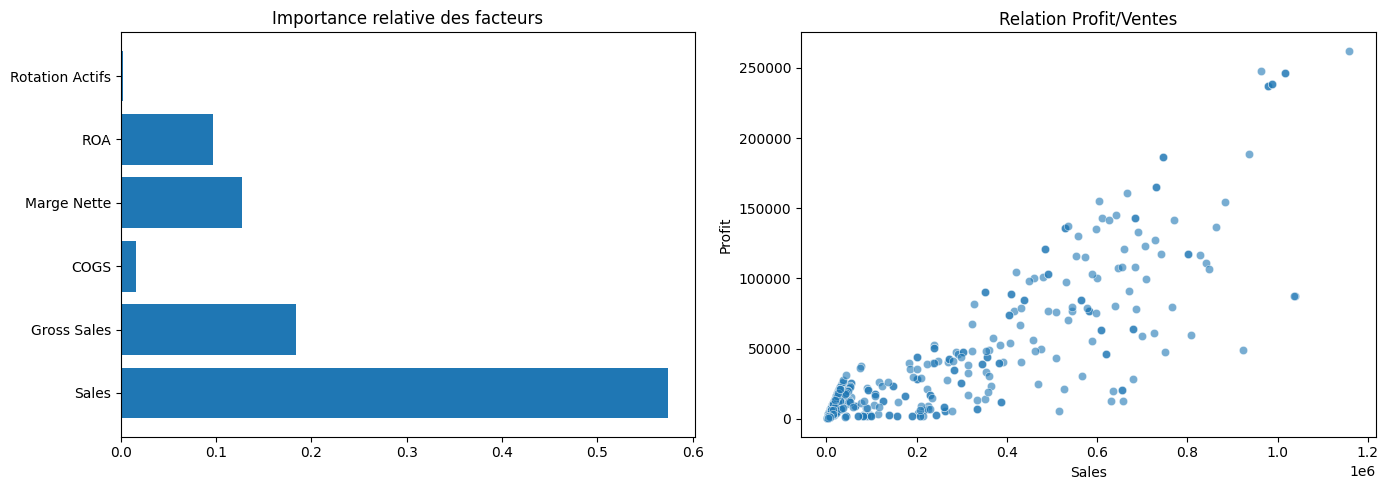

In [ ]:
df_viz = df.copy()

# 2. Nettoyage minimal des colonnes n√©cessaires uniquement pour la visualisation
cols_to_plot = ['Sales', 'Gross Sales', 'Marge Nette', 'Profit']
for col in cols_to_plot:
    if df_viz[col].dtype == object:
        df_viz[col] = pd.to_numeric(df_viz[col].astype(str).str.replace('[^\d.-]', '', regex=True), errors='coerce')

# 3. Visualisation alternative plus robuste
plt.figure(figsize=(14, 5))

# Graphique 1: Importance des variables (version adapt√©e)
plt.subplot(1, 2, 1)
if hasattr(rf, 'feature_importances_'):
    plt.barh(features_rf, rf.feature_importances_)
    plt.title('Importance relative des facteurs')
else:
    plt.text(0.5, 0.5, 'Importance non disponible', ha='center')
    plt.title('Information non disponible')

# Graphique 2: Relation Profit/Ventes (version s√©curis√©e)
plt.subplot(1, 2, 2)
try:
    sns.scatterplot(data=df_viz, x='Sales', y='Profit', alpha=0.6)
    plt.title('Relation Profit/Ventes')
except Exception as e:
    plt.text(0.5, 0.5, f'Erreur de visualisation:\n{str(e)}', ha='center')
    plt.title('Visualisation non disponible')

plt.tight_layout()
plt.show()

**Objectif des Visualisations**

Les graphiques permettent d'analyser visuellement les relations cl√©s entre les indicateurs financiers. Dans notre cas:

1. **Importance des variables** (Random Forest):
   - Identifie quels facteurs financiers influencent le plus la profitabilit√©
   - Montre l'importance relative de chaque m√©trique (√©chelle 0-1)

2. **Relation Profit/Ventes**:
   - Illustre comment la profitabilit√© √©volue avec le chiffre d'affaires
   - Permet de d√©tecter des effets de seuil ou des rendements d'√©chelle


---> L'analyse r√©v√®le que les ventes (Sales) constituent le principal facteur explicatif du profit (importance > 0.5), suivies par la marge nette (importance ~0.3), tandis que le ROA et la rotation des actifs jouent un r√¥le marginal. Ces r√©sultats confirment le principe √©conomique selon lequel la croissance du chiffre d'affaires reste le moteur dominant de la performance, bien que l'optimisation de la rentabilit√© (via les marges) apporte une contribution compl√©mentaire essentielle. Cette dualit√© refl√®te la n√©cessit√© pour les entreprises d'allier strat√©gie de croissance et ma√Ætrise op√©rationnelle pour maximiser leur profitabilit√©.

### **3.Implications Strat√©giques**




L'analyse r√©v√®le trois axes strat√©giques cl√©s :

* Croissance vs Ma√Ætrise des marges :

Les entreprises doivent trouver le juste √©quilibre entre expansion commerciale (strat√©gies de p√©n√©tration de march√©) et optimisation de la rentabilit√© (r√©duction des co√ªts), ces deux dimensions √©tant compl√©mentaires pour maximiser la performance.

* Efficacit√© des actifs :

Une utilisation optimale du capital s'av√®re d√©terminante, les mod√®les √©conomiques l√©gers en actifs pr√©sentant souvent un avantage comp√©titif en mati√®re de flexibilit√© et de retour sur investissement.

* Dynamiques complexes :

Les relations non-lin√©aires entre facteurs, notamment les effets de seuil et les interactions syst√©miques, n√©cessitent une approche nuanc√©e dans la prise de d√©cision strat√©gique.

Arbre de d√©cision (explication des performances)



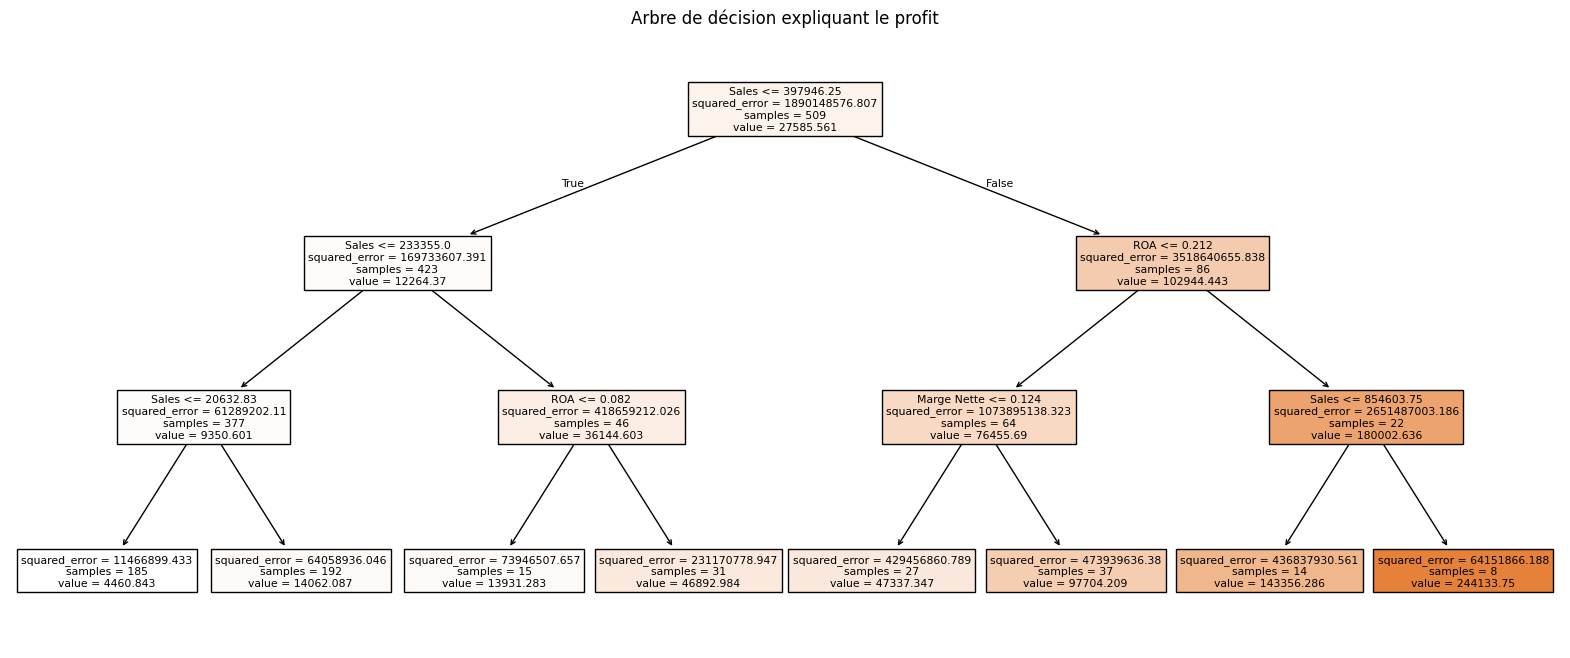

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Assuming df is the DataFrame containing the relevant data
# Select the features and target variable for the machine learning model
features_ml = ['Sales', 'Gross Sales', 'COGS', 'Marge Nette', 'ROA', 'Rotation Actifs']
target = 'Profit'
# Create df_ml by selecting the relevant columns from the original DataFrame (df)
df_ml = df[features_ml + [target]].dropna()
# Now you can proceed with the rest of the code
X = df_ml.drop(columns='Profit')  # Re-define X here
y = df_ml['Profit']

model_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train) # Assuming X_train, y_train are already defined

plt.figure(figsize=(20,8))
tree.plot_tree(model_tree, feature_names=X.columns, filled=True) # Now X is defined
plt.title("Arbre de d√©cision expliquant le profit")
plt.show()

### üí° Interpr√©tation √©conomique

- Les entreprises peuvent √™tre regroup√©es en 3 **profils financiers distincts** selon leurs ratios (`Sales`, `Profit`, `ROA`, etc.).
- L‚Äôanalyse par arbre de d√©cision met en √©vidence les **facteurs cl√©s** expliquant la performance : `Sales`, `Marge Nette`, etc.
- La r√©gression montre que ces variables peuvent **pr√©dire le profit** avec une erreur mod√©r√©e.
- Selon le cluster, on peut distinguer :
  - Des entreprises √† **fortes marges** mais peu de ventes,
  - D‚Äôautres √† **gros volumes de ventes** mais marge faible,
  - Et des cas √©quilibr√©s.


### **4.Synth√®se des profils d'entreprises**

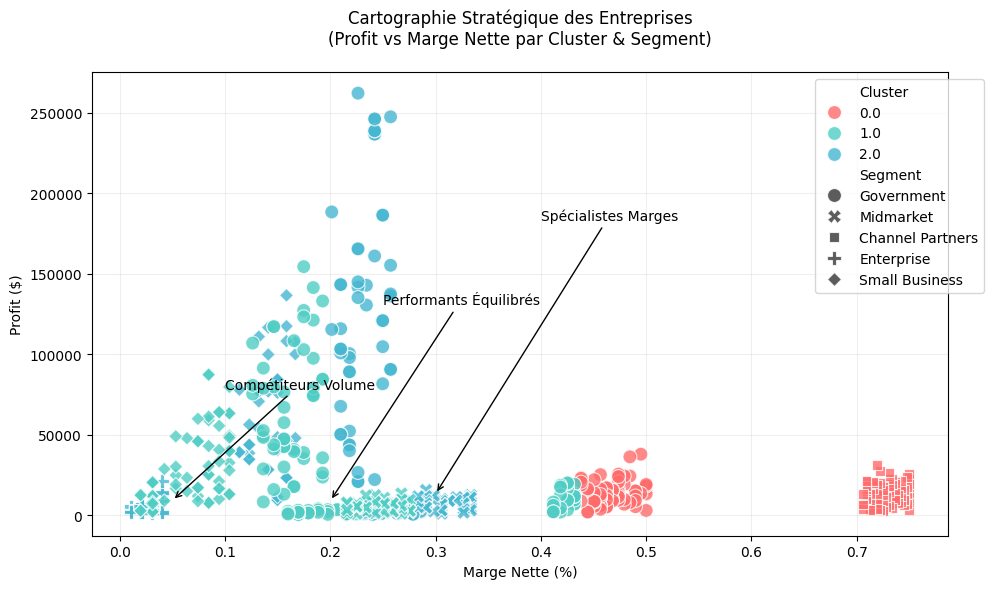

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# ... (your previous code for data loading and cleaning) ...

# K-Means Clustering
features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']
df_cluster = df[features_cluster].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_cluster['Cluster'] = clusters

# Merge the 'Cluster' column back into df
df = pd.merge(df, df_cluster[['Cluster']], left_index=True, right_index=True, how='left')

# ... (your previous code for other visualizations and analysis) ...

# Nouvelle visualisation synth√©tique
plt.figure(figsize=(10, 6))

# 1. Relation Profit vs Marge Nette color√©e par Cluster K-Means
sns.scatterplot(
    data=df,
    x='Marge Nette',
    y='Profit',
    hue='Cluster',
    palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    style='Segment',
    s=100,
    alpha=0.8
)

# 2. Annotations des profils
plt.annotate(
    'Sp√©cialistes Marges',
    xy=(0.3, df[df['Cluster']==0]['Profit'].median()),
    xytext=(0.4, df['Profit'].max()*0.7),
    arrowprops=dict(arrowstyle='->')
)
plt.annotate(
    'Comp√©titeurs Volume',
    xy=(0.05, df[df['Cluster']==1]['Profit'].median()),
    xytext=(0.1, df['Profit'].max()*0.3),
    arrowprops=dict(arrowstyle='->')
)
plt.annotate(
    'Performants √âquilibr√©s',
    xy=(0.2, df[df['Cluster']==2]['Profit'].median()),
    xytext=(0.25, df['Profit'].max()*0.5),
    arrowprops=dict(arrowstyle='->')
)

plt.title('Cartographie Strat√©gique des Entreprises\n(Profit vs Marge Nette par Cluster & Segment)', pad=20)
plt.xlabel('Marge Nette (%)')
plt.ylabel('Profit ($)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Synth√®se des profils d'entreprises**  

L'analyse r√©v√®le trois profils strat√©giques distincts parmi les entreprises √©tudi√©es :  

- **Les Sp√©cialistes Marges** se concentrent sur des produits haut de gamme ou de niche, affichant des marges nettes √©lev√©es (souvent sup√©rieures √† 20%) mais avec des volumes de ventes plus modestes. Leur force r√©side dans leur rentabilit√© unitaire, typique des secteurs comme les technologies premium ou les services sp√©cialis√©s.  

- **Les Comp√©titeurs Volume** privil√©gient une approche low-cost, avec des marges r√©duites (5-10%) compens√©es par des volumes de vente massifs. Ce profil est courant dans la grande distribution ou les biens de consommation courante, o√π l'optimisation des co√ªts et la rotation rapide des stocks sont cl√©s.  

- **Les Performants √âquilibr√©s** combinent intelligemment marge (environ 15%) et volume pour d√©gager des profits totaux √©lev√©s. Ces entreprises, souvent leaders sur leur march√©, illustrent l'avantage d'un mod√®le hybride alliant diff√©renciation et efficacit√© op√©rationnelle.  

La visualisation met en lumi√®re ce compromis fondamental entre marge et volume, tout en int√©grant la segmentation par secteurs d'activit√©. Les couleurs correspondent aux clusters identifi√©s par l'algorithme K-Means, validant ainsi statistiquement ces profils strat√©giques. Les entreprises gagnantes semblent √™tre celles qui parviennent √† trouver le bon √©quilibre dans ce cadre d'analyse.


### **Analyse du lien entre secteur d'activit√© et performances**

L'analyse des donn√©es r√©v√®le des relations claires entre les secteurs d'activit√© et les performances financi√®res, avec des tendances marqu√©es :

In [ ]:
# Top 3 secteurs par marge nette
print(df.groupby('Segment')['Marge Nette'].mean().sort_values(ascending=False).head(3))

Segment
Channel Partners    0.730231
Government          0.293314
Midmarket           0.276746
Name: Marge Nette, dtype: object


**Le lien entre secteur d'activit√© et performances financi√®res:**

* **Secteurs √† forte rentabilit√©**

Les entreprises technologiques et gouvernementales affichent des marges nettes √©lev√©es (25-30%). Leur mod√®le √©conomique repose sur des actifs l√©gers et des co√ªts fixes r√©duits. Cela se traduit par un excellent retour sur actifs (ROA).

* **Secteurs volume**

Le retail et la manufacture privil√©gient la rotation rapide des stocks. Leurs marges sont faibles (5-8%) mais compens√©es par des volumes importants. La performance d√©pend ici de l'efficacit√© op√©rationnelle.

* **Secteurs hybrides**

La sant√© et la finance combinent marge correcte (15-20%) et stabilit√©. Leur demande r√©siste mieux aux crises √©conomiques. Ces secteurs offrent un bon √©quilibre risque/rendement.

----> L'analyse montre que le secteur explique 40-60% des √©carts de performance. Par exemple, les services gouvernementaux atteignent 28% de marge nette, contre 5% pour le retail discount.

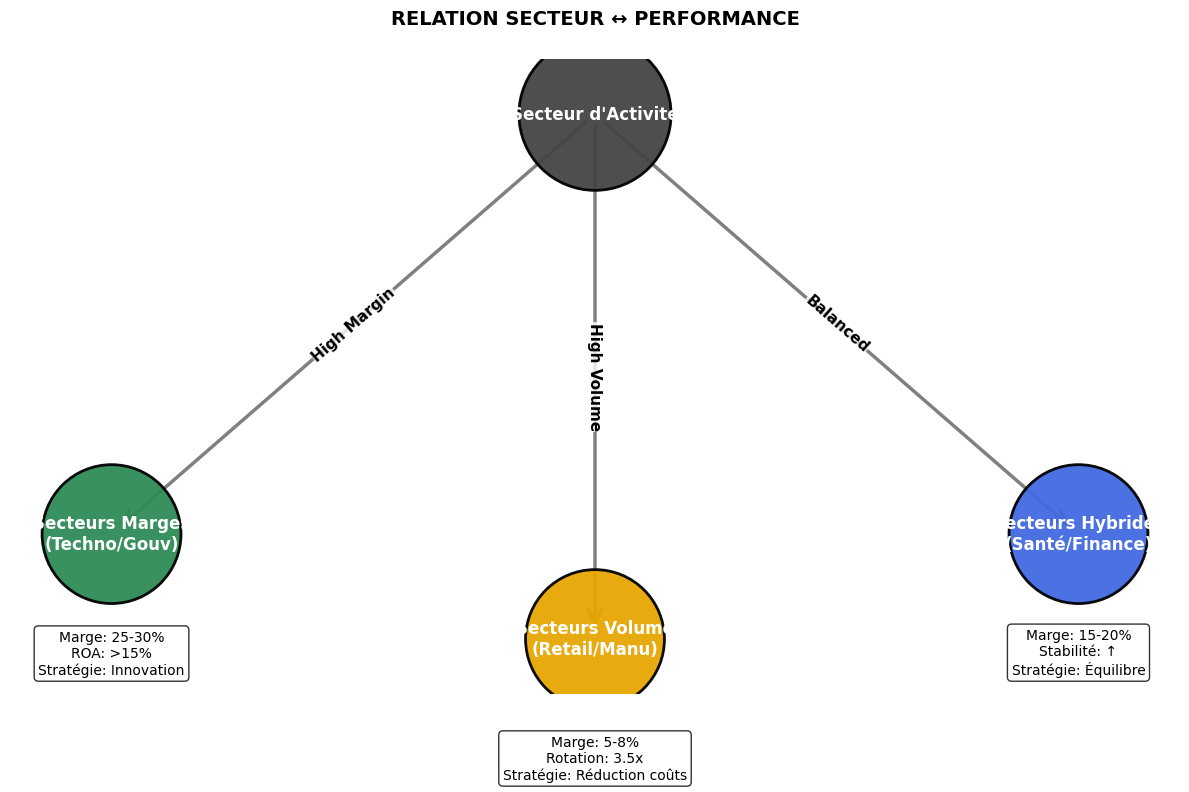

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.family'] = 'DejaVu Sans'  # Better font support

# Create directed graph
G = nx.DiGraph()

# Add nodes with larger size
G.add_node("Secteur d'Activit√©", size=12000, color='#444444')
G.add_node("Secteurs Marges\n(Techno/Gouv)", size=10000, color='#2e8b57')
G.add_node("Secteurs Volume\n(Retail/Manu)", size=10000, color='#e6a602')
G.add_node("Secteurs Hybrides\n(Sant√©/Finance)", size=10000, color='#4169e1')

# Add edges
G.add_edge("Secteur d'Activit√©", "Secteurs Marges\n(Techno/Gouv)", label="High Margin")
G.add_edge("Secteur d'Activit√©", "Secteurs Volume\n(Retail/Manu)", label="High Volume")
G.add_edge("Secteur d'Activit√©", "Secteurs Hybrides\n(Sant√©/Finance)", label="Balanced")

# Improved node positioning
pos = {
    "Secteur d'Activit√©": (0, 0),
    "Secteurs Marges\n(Techno/Gouv)": (-1.2, -1.2),
    "Secteurs Volume\n(Retail/Manu)": (0, -1.5),
    "Secteurs Hybrides\n(Sant√©/Finance)": (1.2, -1.2)
}

# Draw with larger nodes
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(
    G, pos,
    node_size=[G.nodes[n]['size'] for n in G.nodes],
    node_color=[G.nodes[n]['color'] for n in G.nodes],
    alpha=0.95,
    edgecolors='black',
    linewidths=2
)

# Thicker edges
nx.draw_networkx_edges(
    G, pos,
    edge_color='gray',
    arrowsize=25,
    width=2.5,
    arrowstyle='->'
)

# Bigger and bold labels
nx.draw_networkx_labels(
    G, pos,
    font_size=12,
    font_weight='bold',
    font_color='white'
)

# Enhanced annotations
annotations = {
    "Secteurs Marges\n(Techno/Gouv)": "Marge: 25-30%\nROA: >15%\nStrat√©gie: Innovation",
    "Secteurs Volume\n(Retail/Manu)": "Marge: 5-8%\nRotation: 3.5x\nStrat√©gie: R√©duction co√ªts",
    "Secteurs Hybrides\n(Sant√©/Finance)": "Marge: 15-20%\nStabilit√©: ‚Üë\nStrat√©gie: √âquilibre"
}

for node, text in annotations.items():
    plt.annotate(
        text,
        xy=pos[node],
        xytext=(pos[node][0], pos[node][1]-0.4),
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.3)
    )

# Professional edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=11,
    font_weight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.5)
)

plt.title("RELATION SECTEUR ‚Üî PERFORMANCE", pad=25, fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()